In [1]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdbscan
import sklearn.cluster as cluster
from ema_workbench.analysis import prim
%matplotlib inline
plt.style.use('fivethirtyeight')

/work/06659/wmobley/minconda3/lib/python3.11/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/work/06659/wmobley/minconda3/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(7,5)})


In [3]:
df = pd.read_csv("Curated/HandCleaned/CodedSurveyTopics.csv")

In [4]:
print(len(df))

58


In [5]:
df = df.fillna(0)
surveyData = df[df.columns[1:-1]].values

In [6]:
df['Survey1']=["Combined" in d for d in df.file]

In [7]:
df

,file,federal,state,regional,local,operators-in-training,system operators,community members,not stage specific,source water,...,environmental attorneys,end-users,relevance,to environment,to operator,positive implications,negative implications,to end user,covid-19,Survey1
0,INTERVIEW 1 21-22 Combined,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,INTERVIEW 10 21-22 Combined,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True
2,INTERVIEW 11 21-22 Combined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,INTERVIEW 12 21-22 Combined,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True
4,INTERVIEW 13 21-22 Combined,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
5,INTERVIEW 14 21-22 Combined,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,True
6,INTERVIEW 15 21-22 Combined,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,True
7,INTERVIEW 16 21-22 Combined,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True
8,INTERVIEW 17 21-22 Combined,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9,INTERVIEW 2 21-22 Combined,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,True


In [8]:
surveyData

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [9]:
import umap
reducer  = umap.UMAP(
    n_neighbors=10,
    min_dist=0.0,
    n_components=2,
    random_state=42,
)

/work/06659/wmobley/minconda3/lib/python3.11/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [10]:
embedding = reducer.fit_transform(surveyData)
embedding.shape


/work/06659/wmobley/minconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(58, 2)

In [11]:
embedding[:][df['Survey1']]

array([[-2.684495  , -0.61572695],
       [17.969175  , 18.769773  ],
       [-1.4151238 , -2.5139015 ],
       [15.189286  , 15.835995  ],
       [-1.2438091 , -2.340726  ],
       [ 0.8175303 ,  5.1901164 ],
       [-1.8982227 ,  2.0483682 ],
       [14.911927  , 15.558682  ],
       [19.725174  , 20.631365  ],
       [ 0.10533086,  4.9355407 ],
       [-2.4887242 , -1.0679713 ],
       [18.084675  , 19.242445  ],
       [ 0.6089806 ,  5.330691  ],
       [ 0.5173054 ,  5.1537476 ],
       [-2.33838   ,  2.1487768 ],
       [18.215725  , 18.915976  ],
       [18.416754  , 19.068216  ]], dtype=float32)

/work/06659/wmobley/minconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


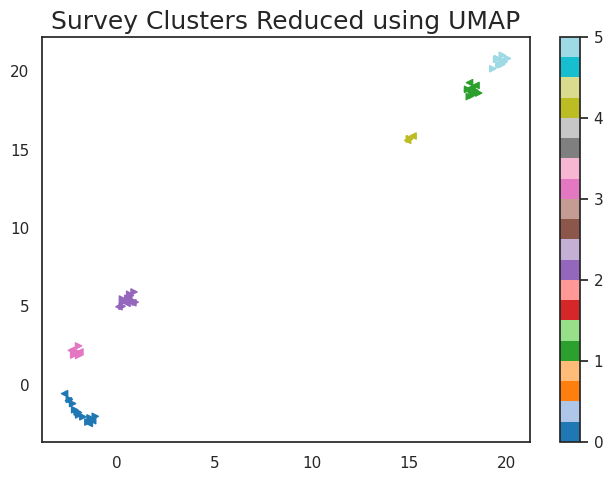

In [14]:
kmeans_labels = cluster.KMeans(n_clusters=6).fit_predict(embedding)
plt.scatter(embedding[:, 0][df['Survey1']], embedding[:, 1][df['Survey1']], c=kmeans_labels[df['Survey1']],marker="<", s=20, cmap='tab20');
plt.scatter(embedding[:, 0][df['Survey1']==False], embedding[:, 1][df['Survey1']==False],marker=">", c=kmeans_labels[df['Survey1']==False], s=20, cmap='tab20');
plt.colorbar()
plt.title('Survey Clusters Reduced using UMAP', fontsize=18);

In [13]:
c = df.columns[1:-2].tolist()
c.append('Survey1')
c

['federal',
 'state',
 'regional',
 'local',
 'operators-in-training',
 'system operators',
 'community members',
 'not stage specific',
 'source water',
 'potable water treatment',
 'potable water distribution',
 'wastewater collection',
 'wastewater treatment',
 'water storage',
 'end-users storage system',
 'administrative processes',
 'compliance',
 'strategic planning',
 'funding',
 'worker safety',
 'testing',
 'laboratory',
 'field',
 'at-home',
 'effluent at the conclusion of the treatment process',
 'biological',
 'chemical',
 'physical properties',
 'water received by the end-user',
 'biological.1',
 'chemical.1',
 'physical properties.1',
 'treatment process',
 'equipment installation',
 'equipment operations',
 'equipment maintenance',
 'system components',
 'system monitoring',
 'climate and environment',
 'cybersecurity',
 'system breakdown',
 'hazardous materials',
 'background',
 'application process',
 'benefits of certification',
 'accessibility of material',
 'in-per

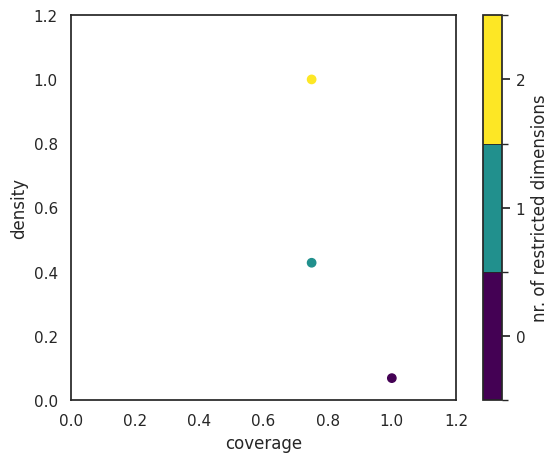

In [57]:
y = kmeans_labels==3


p = prim.Prim(df[c], y, threshold=0.8)
    
box = p.find_box()
box.show_tradeoff()

plt.show()

coverage    0.750000
density     1.000000
id          2.000000
mass        0.051724
mean        1.000000
res_dim     2.000000
Name: 2, dtype: float64

                       box 2                         
                         min  max  qp value  qp value
equipment installation   0.0  0.5       NaN  0.078717
to end user              0.5  1.0  0.002148       NaN



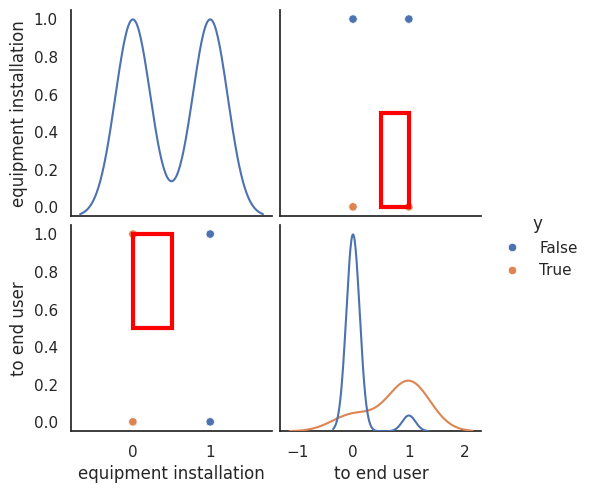

In [58]:
box.inspect(2)
box.show_pairs_scatter(2)

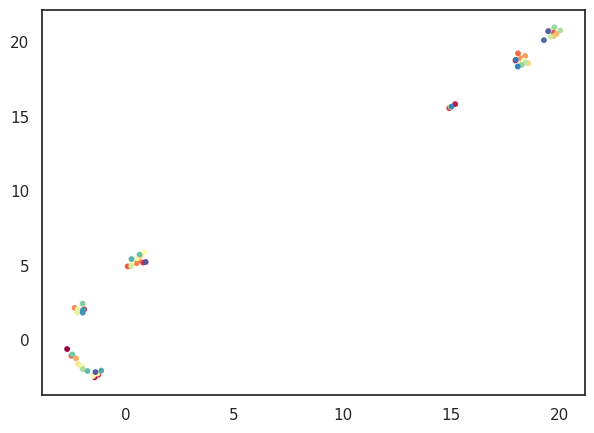

In [14]:
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=[i for i, f in enumerate(df.file)] ,s=10, cmap='Spectral');

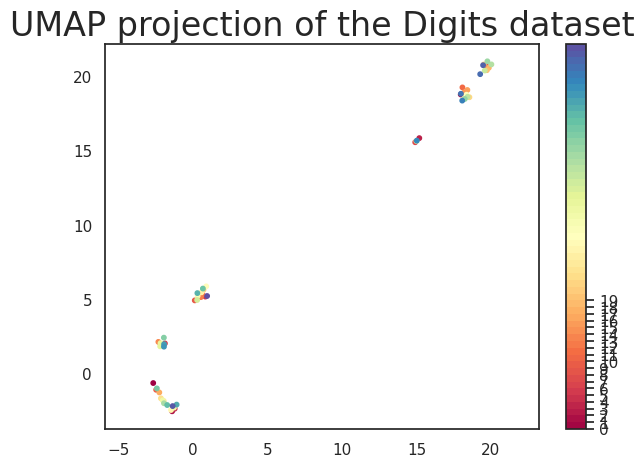

In [15]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[i for i, f in enumerate(df.file)], cmap='Spectral', s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(df))).set_ticks(np.arange(len(df)/3))
plt.title('UMAP projection of the Digits dataset', fontsize=24);